<a href="https://colab.research.google.com/github/aysharega/Advanced-computing-Lab/blob/master/Program_13_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Simple Auto Encoder model to reduce the dimensionality of Iris dataset.

11501568/11490434 [==============================] - 0s 0us/step
Size of Xtrain: (60000, 28, 28)
Size of Xtest: (10000, 28, 28)
xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/6
400/400 [==============================] - 5s 11ms/step - loss: 0.0452 - val_loss: 0.0211
Epoch 2/6
400/400 [==============================] - 4s 10ms/step - loss: 0.0171 - val_loss: 0.0135
Epoch 3/6
400/400 [==============================] - 4s 10ms/step - loss: 0.0125 - val_loss: 0.0108
Epoch 4/6
400/400 [==============================] - 4s 10ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 5/6
400/400 [==============================] - 4s 9ms/step - loss: 0.0092 - val_loss: 0.0084
Epoch 6/6
400/400 [==============================] - 4s 10ms/step - loss: 0.0083 - val_loss: 0.0076


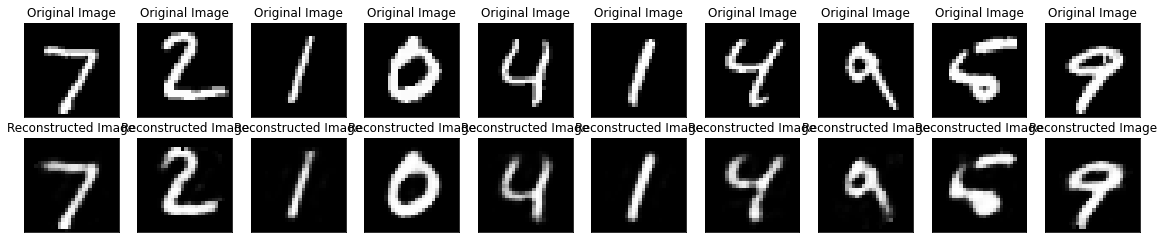

dict_keys(['loss', 'val_loss'])


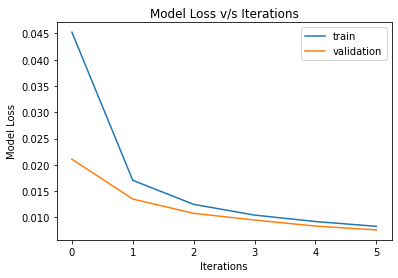

In [1]:
#1. Load files
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Layer, Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#2. Load the data
(xtrain,_),(xtest,_) = mnist.load_data()
print("Size of Xtrain:",xtrain.shape)
print("Size of Xtest:",xtest.shape)

#3. Convert to 1 channel
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)

#4. Normalize and print data
xtrain = xtrain.astype("float32")/255.
xtest = xtest.astype("float32")/255.
print('xtrain shape:', xtrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')

#5. Flatten the layers for the fully connected networks
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))

#6. Built multi layer autoencoder
input_size = 784
hidden_size = 128
code_size = 64
x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
o = Dense(input_size, activation='sigmoid')(hidden_2)
AE = Model(inputs=x, outputs=o)
AE.compile(optimizer='adam', loss='mse')

#7. Training
epochs = 6
batch_size = 150
history = AE.fit(xtrain, xtrain, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(xtest, xtest))

#8. Testing
decoded_images = AE.predict(xtest)

#9. Plot
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    #a. Display original image
    ax = plt.subplot(3, n, i+1)
    plt.title('Original Image')
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #b. Display reconstructed image
    ax = plt.subplot(3, n, i+n+1)
    plt.title('Reconstructed Image')
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#10. Plot losses
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss v/s Iterations')
plt.ylabel('Model Loss')
plt.xlabel('Iterations')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()